In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
info = pd.read_csv('ml-100k/u.info', sep=' ', header=None)
info.columns = ['Count', 'Type']
info

,Count,Type
0,943,users
1,1682,items
2,100000,ratings


In [3]:
occupation = pd.read_csv('ml-100k/u.occupation', header=None)
occupation.columns = ['Occupation']
occupation

,Occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [4]:
genre = pd.read_csv('ml-100k/u.genre', header= None , sep = '|' )
genre.columns = ['Genre' , 'genre_id']
genre

,Genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [5]:
items = pd.read_csv('ml-100k/u.item' , header = None , sep = "|" , encoding='latin-1')

meta_headers = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL']

# using genre_headers from genre df to avoid any typos or ambiguity like "Children's" and "Childrens"
genre_headers = genre['Genre'].values.tolist()

# items.columns = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
#               'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
#               'Childrens' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
#               'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci_Fi' ,
#               'Thriller' , 'War' , 'Western']

items.columns = meta_headers + genre_headers

items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data = pd.read_csv('ml-100k/u.data', header= None , sep = '\t')
data.columns = ['user id' , 'movie id' , 'rating' , 'timestamp']
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
user = pd.read_csv('ml-100k/u.user', header= None , sep = '|')
user.columns = ['user id' , 'age' , 'gender' , 'occupation' , 'zip code']
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Exploratory Data Analysis (Plots)

In [8]:
def extract_movie_title_from_id(mid):
    return items[items['movie id'] == mid]['movie title'].values[0]

def extract_rating_count(mid):
    return len(data[data['movie id'] == mid])

# calculating average rating for each movie
df = data.groupby('movie id', as_index=False)['rating'].mean()

# adding movie_name corresponding to movie id
df['movie title'] = df['movie id'].apply(extract_movie_title_from_id)

# add rating counts for checking popularity
df['rating_count'] = df['movie id'].apply(extract_rating_count)

In [9]:
df.head()

,movie id,rating,movie title,rating_count
0,1,3.878319,Toy Story (1995),452
1,2,3.206107,GoldenEye (1995),131
2,3,3.033333,Four Rooms (1995),90
3,4,3.550239,Get Shorty (1995),209
4,5,3.302326,Copycat (1995),86


Text(0.5, 1.0, 'Top 20 highest rated movies')

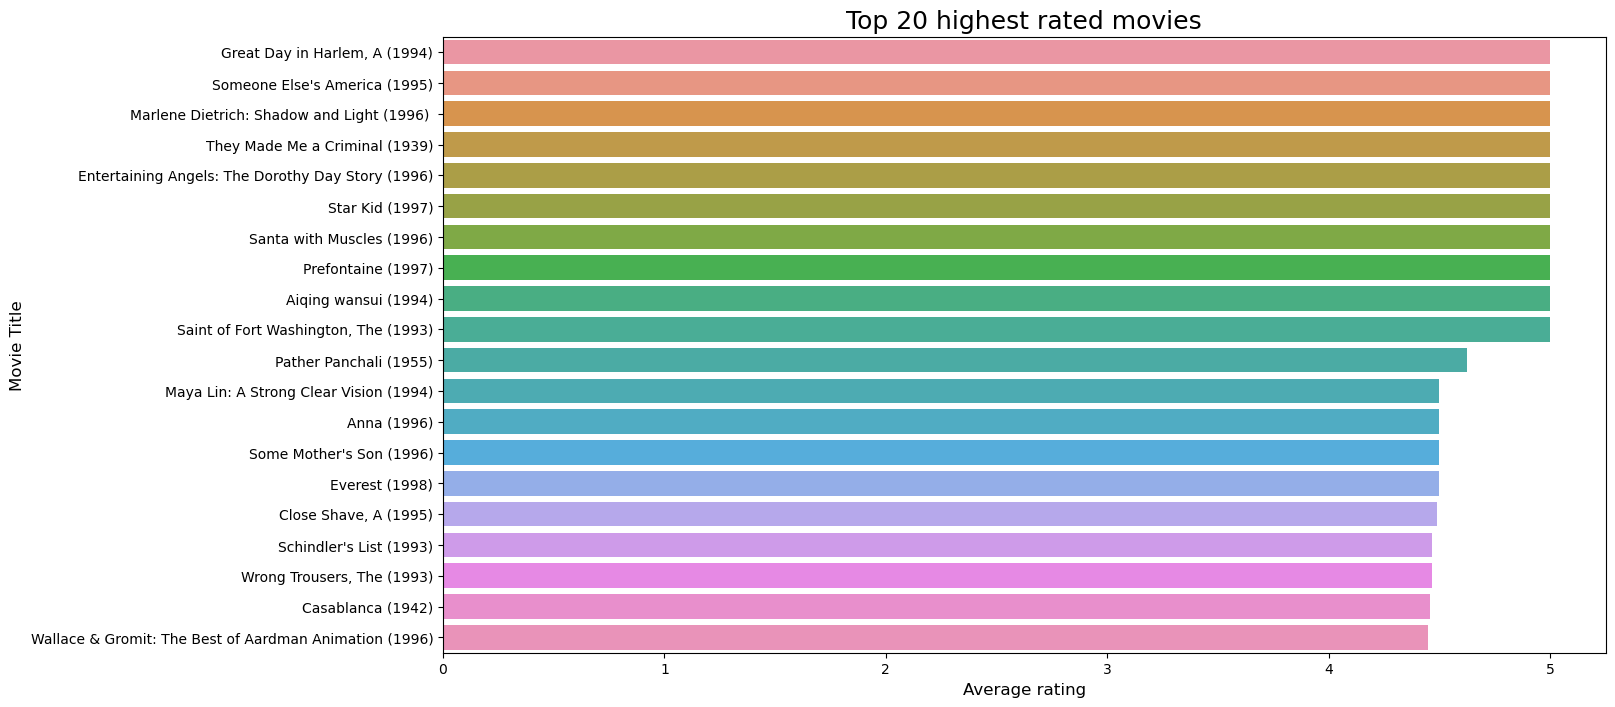

In [10]:
# top rated movies (descending order by rating)
top_rated = df.sort_values('rating', ascending=False)
# taking top 20 movies
top_rated = top_rated[:20]
plt.figure(figsize = (15,8))
sns.barplot(data = top_rated, y = 'movie title', x = 'rating')
plt.ylabel('Movie Title', fontsize = 12)
plt.xlabel('Average rating', fontsize = 12)
plt.title('Top 20 highest rated movies', fontsize = 18)

Text(0.5, 1.0, 'Top 20 most popular movies')

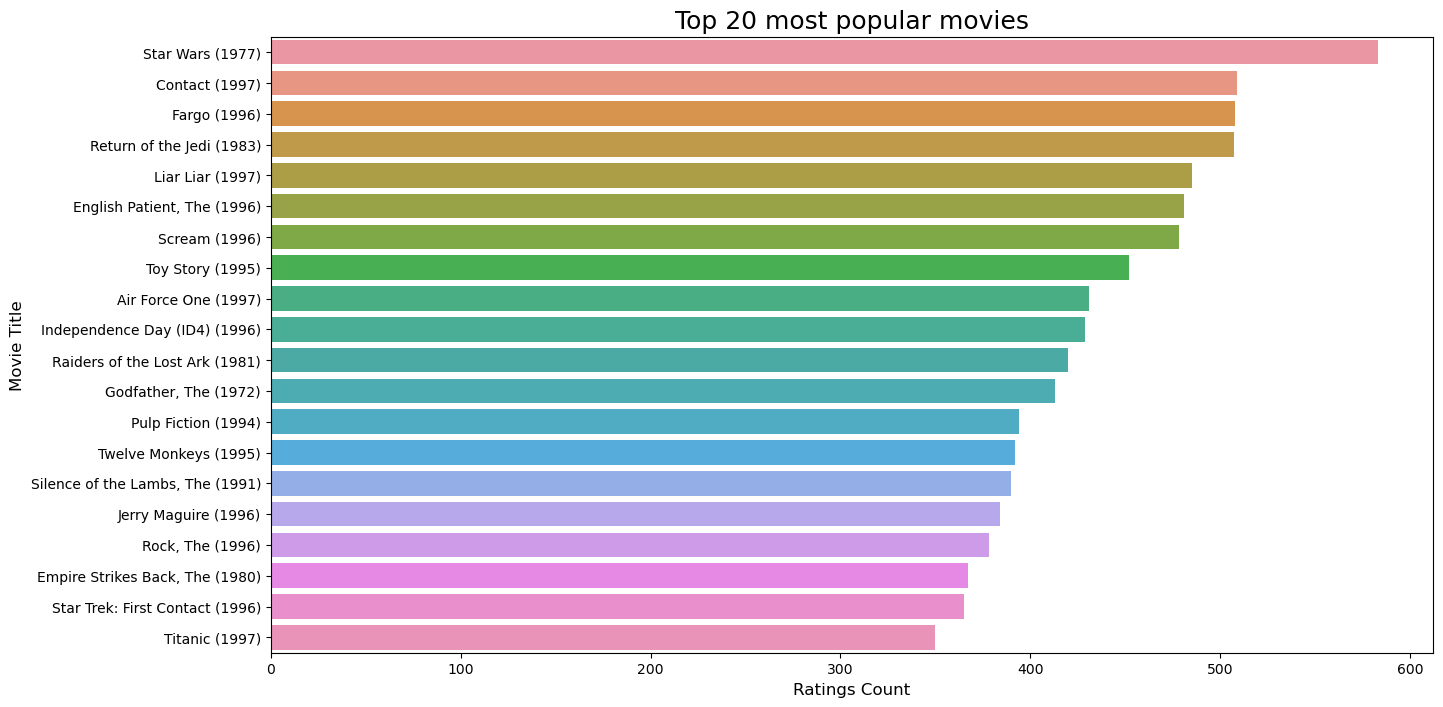

In [11]:
# top popular movies
top_popular = df.sort_values('rating_count', ascending=False)
# taking top 20 movies
top_popular = top_popular[:20]
plt.figure(figsize = (15,8))
sns.barplot(data = top_popular, y = 'movie title', x = 'rating_count')
plt.ylabel('Movie Title', fontsize = 12)
plt.xlabel('Ratings Count', fontsize = 12)
plt.title('Top 20 most popular movies', fontsize = 18)

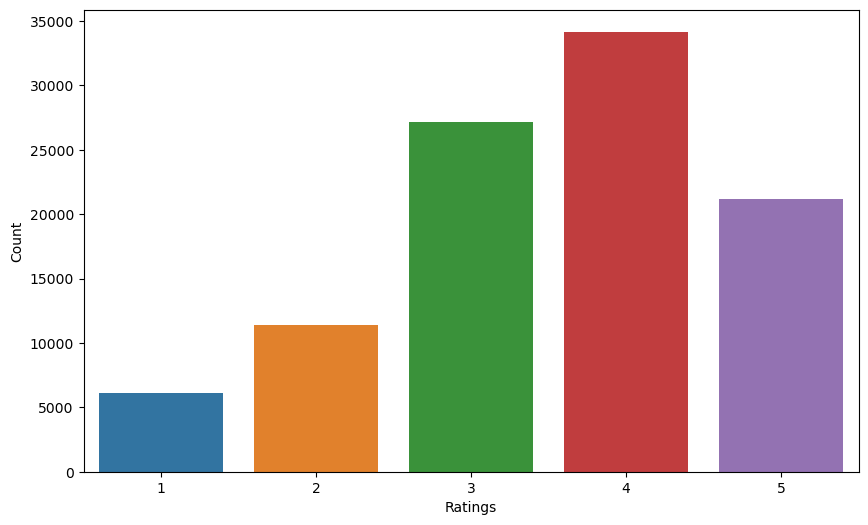

In [12]:
# most frequently given rating
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = 'rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [13]:
def get_movie_count(genre_name):
    return items[genre_name].value_counts()[1]

def get_genre_rating(genre_name):
    genre_movies = items[items[genre_name] == 1]['movie id'].values.tolist()
    if not len(genre_movies):
        return 0
    
    average_rating = df[df['movie id'].isin(genre_movies)]['rating'].mean()
    return average_rating

def get_genre_rating_count(genre_name):
    genre_movies = items[items[genre_name] == 1]['movie id'].values.tolist()
    if not len(genre_movies):
        return 0
    
    return len(df[df['movie id'].isin(genre_movies)])

In [14]:
genre_df = genre.copy()
genre_df['movie count'] = genre_df['Genre'].apply(get_movie_count)
genre_df['rating'] = genre_df['Genre'].apply(get_genre_rating)
genre_df['rating count'] = genre_df['Genre'].apply(get_genre_rating_count)

In [15]:
genre_df.head()

,Genre,genre_id,movie count,rating,rating count
0,unknown,0,2,2.222222,2
1,Action,1,251,2.966332,251
2,Adventure,2,135,3.143967,135
3,Animation,3,42,3.298813,42
4,Children's,4,122,2.916885,122


Text(0.5, 1.0, 'Top rated genres')

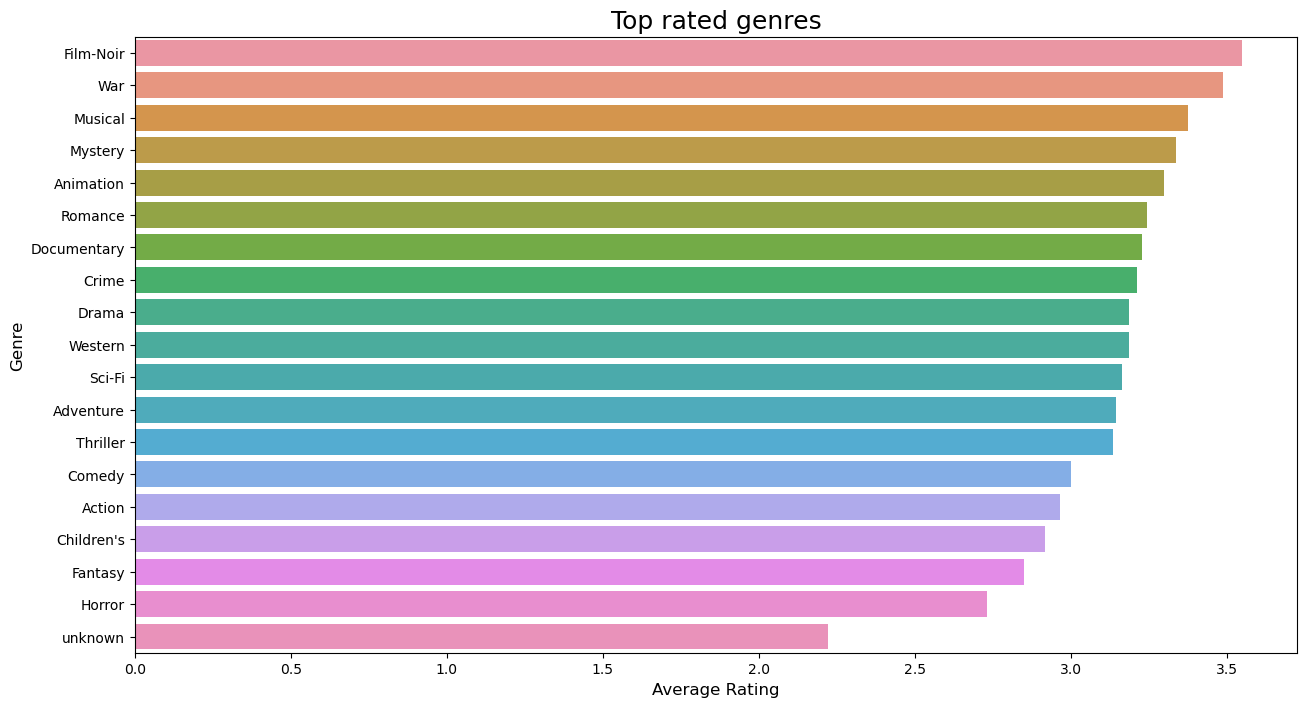

In [16]:
# top rated genres
top_rated_genres = genre_df.sort_values('rating', ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(data = top_rated_genres, y = 'Genre', x = 'rating')
plt.ylabel('Genre', fontsize = 12)
plt.xlabel('Average Rating', fontsize = 12)
plt.title('Top rated genres', fontsize = 18)

Text(0.5, 1.0, 'Most popular genres')

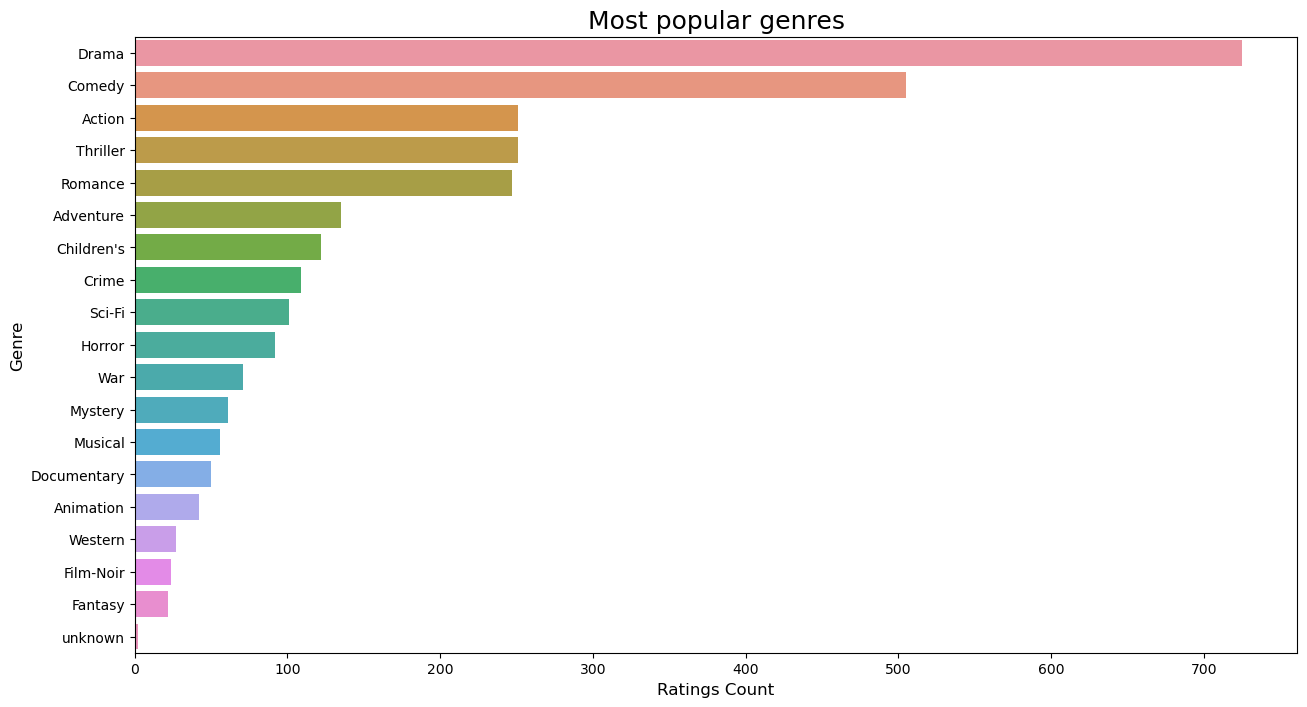

In [17]:
top_popular_genres = genre_df.sort_values('rating count', ascending=False)

plt.figure(figsize = (15,8))
sns.barplot(data = top_popular_genres, y = 'Genre', x = 'rating count')
plt.ylabel('Genre', fontsize = 12)
plt.xlabel('Ratings Count', fontsize = 12)
plt.title('Most popular genres', fontsize = 18)